# Mod 2

In [1]:
# !python3 -m pip install pandas
# !python3 -m pip install matplotlib
!python3 -m pip install seaborn

In [18]:
# Import the libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Read the CSV file into memory and turn into dataframe
sales_df = pd.read_csv('./supermarket-sales.csv')

In [4]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### Descriptive Statistics

<img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2023/06/22125902/types-of-data-1024x555-1.png" height="200">

**Types of Data**
- Quantitative
    - Discrete
    - Continuous
- Qualititative
    - Nominal
    - Ordinal

In [5]:
sales_df['Unit price'].describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64

In [6]:
# filter = ['Unit price','Tax 5%'] 


filter = sales_df['Unit price'] > 55
subset_df = sales_df[filter]
subset_df['Invoice ID']

0      750-67-8428
3      123-19-1176
4      373-73-7910
5      699-14-3026
6      355-53-5943
          ...     
992    745-74-0715
994    652-49-6720
996    303-96-2227
998    347-56-2442
999    849-09-3807
Name: Invoice ID, Length: 502, dtype: object

### Exercise 1

1. Create a subset of `sales_df` where the unit price is > 55 and < 75
2. Name this subset `subset_df`
3. Find the mean average of "total" from `subset_df` (hint: use the `.describe()`)
4. Use `.head()` to show the top 5 rows of these columns "Invoice ID, Product line, Payment"

In [7]:
# Your code here...

### Variance, Standard Deviation, Covariance, and Correlation

**Variance** <br/><br/>
$ \displaystyle\frac{\sum_{i=1}^N (\mu-x_i)^2}{N} =\sigma^2$

**Standard Deviation**<br/><br/>

$ \sqrt{\sigma^2} =\sigma$


**Covariance** <br/><br/>
$ \displaystyle\frac{\sum_{i=1}^N (\mu_x-x_i)^2 \times (\mu_y-y_i)^2}{N} = \text{Cov(X,Y)}$ <br/><br/>

**Correlation** <br/><br/>

$\displaystyle\frac{{\sum _{i=0}^N\:\left(x_i-\bar{x}\:\:\right)\left(y_i\:-\bar{y}\right)}}{\sigma_{X} \sigma_{Y}} = \rho; \quad -1 \leq \rho \leq 1$

### Beginning Inferential Statiscics with Pandas

In [8]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [30]:
filter = ['Unit price', 'Quantity', 'Total', 'Rating']

quantitative_df = sales_df[filter]
quantitative_df.head()

,Unit price,Quantity,Total,Rating
0,74.69,7,548.9715,9.1
1,15.28,5,80.2200,9.6
2,46.33,7,340.5255,7.4
3,58.22,8,489.0480,8.4
4,86.31,7,634.3785,5.3


In [31]:
quantitative_df.cov()

,Unit price,Quantity,Total,Rating
Unit price,701.965331,0.834778,4130.035142,-0.399668
Quantity,0.834778,8.546446,507.140978,-0.079456
Total,4130.035142,507.140978,60459.598018,-15.399306
Rating,-0.399668,-0.079456,-15.399306,2.953518


In [32]:
quantitative_df.corr()

,Unit price,Quantity,Total,Rating
Unit price,1.000000,0.010778,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,1.000000


In [58]:
quantitative_df.describe()

,Unit price,Quantity,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,6.97270
std,26.494628,2.923431,245.885335,1.71858
min,10.080000,1.000000,10.678500,4.00000
25%,32.875000,3.000000,124.422375,5.50000
50%,55.230000,5.000000,253.848000,7.00000
75%,77.935000,8.000000,471.350250,8.50000
max,99.960000,10.000000,1042.650000,10.00000


<AxesSubplot:>

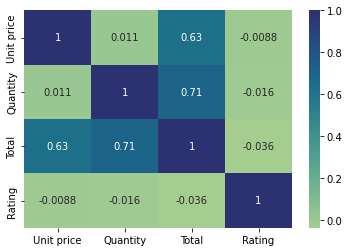

In [34]:
sb.heatmap(quantitative_df.corr(), annot=True, cmap="crest")

### Regression Analysis with Pandas

**Aim of Regression Analysis**
1. Measure relationships between variables
2. Forecast values within range of data

$y = \beta_0 + (\beta_1 \times x) + \epsilon$

where
- $y$ is the response variable (aka dependent or target)
- $x$ is the explanatory variable (aka independent or feature)
- $\beta_0$ is the bias term (aka y-intercept)
- $\beta_1$ is the regression coefficient (aka weight)
- $\epsilon$ is the residual (aka the error term)

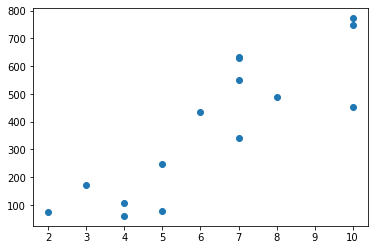

In [65]:
# Creating the Scatter Plot
sales_sorted_df = sales_df[0:15].sort_values(by='Quantity')

Y = sales_sorted_df['Total']
X = sales_sorted_df['Quantity']

plt.scatter(X,Y)

### Find the Model Terms

$\beta_1 = \rho \times \dfrac{\sigma_{Y}}{\sigma_{X}}$<br/><br/>
$\beta_0 = \bar{Y} - \beta_1 \times \bar{X} $<br/><br/>
$\hat{Y} = (\beta_0 + (\beta_1 \times X))$<br/><br/><br/><br/>
$\epsilon = Y - (\beta_0 + (\beta_1 \times X))$ or <br/>
$\epsilon = |Y - \hat{Y}|$

In [67]:
# Find beta_1
rho = 0.71
std_y = 245.88
std_x = 2.923431
beta_1 = rho * (std_y / std_x)

# Find beta_0
X_bar = X.mean()
Y_bar = Y.mean()
beta_0 = Y_bar - beta_1 * X_bar
Y_hat = beta_0 + (beta_1 * X)

# Find epsilon
epsilon = abs(Y_hat - Y)


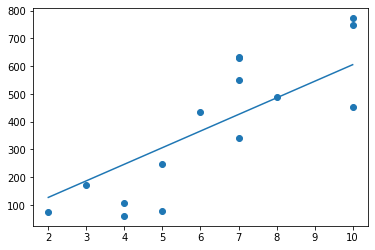

In [68]:
# Creating the Scatter Plot
sales_sorted_df = sales_df[0:15].sort_values(by='Quantity')

Y = sales_sorted_df['Total']
X = sales_sorted_df['Quantity']

# Draw the scatter plot
plt.scatter(X,Y)

# Add the model line on the scatter plot
plt.plot(X, Y_hat)